In [90]:

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [91]:
df=pd.read_csv("ResultWithoutAUC.csv");


In [92]:
df.head(5)

,MODEL,EPOCH,TRAINACC,TRAINLOSS,TESTACC,TESTLOSS,TIME,TRAINPRECISION,TRAINRECALL,TRAINF1SCORE,TESTPRECISION,TESTRECALL,TESTF1SCORE
0,GABORNN,1,0.505181,0.005443,0.518333,0.005537,1164.491056,0.519375,0.444913,0.479269,0.526800,0.402951,0.456627
1,GABORNN,2,0.538336,0.005399,0.572667,0.005470,1095.478688,0.569223,0.434139,0.492588,0.669661,0.304339,0.418489
2,GABORNN,3,0.562907,0.005340,0.620333,0.005335,1113.495431,0.590213,0.486026,0.533077,0.638958,0.546957,0.589389
3,GABORNN,4,0.592436,0.005236,0.607333,0.005216,1120.446741,0.625729,0.503537,0.558022,0.586084,0.766376,0.664213
4,GABORNN,5,0.619375,0.005077,0.649667,0.004988,1113.674487,0.650063,0.537596,0.588504,0.665790,0.602734,0.632695


In [93]:
models=df.MODEL.unique()
models

array(['GABORNN', 'CNN', 'GaborNN5Layer', 'RESNET18', 'VGGNET16',
       'GaborNN7Layer'], dtype=object)

In [94]:
epochs=df.EPOCH.unique()
epochs

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], dtype=int64)

In [95]:
df['TRAINACC'].apply(lambda x : round(x*100,2))

0      50.52
1      53.83
2      56.29
3      59.24
4      61.94
       ...  
175    74.25
176    75.35
177    76.28
178    75.47
179    76.07
Name: TRAINACC, Length: 180, dtype: float64

In [96]:
metrics=df.describe().columns.values
metrics

array(['EPOCH', 'TRAINACC', 'TRAINLOSS', 'TESTACC', 'TESTLOSS', 'TIME',
       'TRAINPRECISION', 'TRAINRECALL', 'TRAINF1SCORE', 'TESTPRECISION',
       'TESTRECALL', 'TESTF1SCORE'], dtype=object)

In [97]:
for metric in metrics:
    df[metric+'_PER']=df[metric].apply(lambda x : round(x*100,2))

In [98]:
df.head(5)

,MODEL,EPOCH,TRAINACC,TRAINLOSS,TESTACC,TESTLOSS,TIME,TRAINPRECISION,TRAINRECALL,TRAINF1SCORE,...,TRAINLOSS_PER,TESTACC_PER,TESTLOSS_PER,TIME_PER,TRAINPRECISION_PER,TRAINRECALL_PER,TRAINF1SCORE_PER,TESTPRECISION_PER,TESTRECALL_PER,TESTF1SCORE_PER
0,GABORNN,1,0.505181,0.005443,0.518333,0.005537,1164.491056,0.519375,0.444913,0.479269,...,0.54,51.83,0.55,116449.11,51.94,44.49,47.93,52.68,40.30,45.66
1,GABORNN,2,0.538336,0.005399,0.572667,0.005470,1095.478688,0.569223,0.434139,0.492588,...,0.54,57.27,0.55,109547.87,56.92,43.41,49.26,66.97,30.43,41.85
2,GABORNN,3,0.562907,0.005340,0.620333,0.005335,1113.495431,0.590213,0.486026,0.533077,...,0.53,62.03,0.53,111349.54,59.02,48.60,53.31,63.90,54.70,58.94
3,GABORNN,4,0.592436,0.005236,0.607333,0.005216,1120.446741,0.625729,0.503537,0.558022,...,0.52,60.73,0.52,112044.67,62.57,50.35,55.80,58.61,76.64,66.42
4,GABORNN,5,0.619375,0.005077,0.649667,0.004988,1113.674487,0.650063,0.537596,0.588504,...,0.51,64.97,0.50,111367.45,65.01,53.76,58.85,66.58,60.27,63.27


In [99]:
df[df.MODEL=='GABORNN'].head(50)

,MODEL,EPOCH,TRAINACC,TRAINLOSS,TESTACC,TESTLOSS,TIME,TRAINPRECISION,TRAINRECALL,TRAINF1SCORE,...,TRAINLOSS_PER,TESTACC_PER,TESTLOSS_PER,TIME_PER,TRAINPRECISION_PER,TRAINRECALL_PER,TRAINF1SCORE_PER,TESTPRECISION_PER,TESTRECALL_PER,TESTF1SCORE_PER
0,GABORNN,1,0.505181,0.005443,0.518333,0.005537,1164.491056,0.519375,0.444913,0.479269,...,0.54,51.83,0.55,116449.11,51.94,44.49,47.93,52.68,40.30,45.66
1,GABORNN,2,0.538336,0.005399,0.572667,0.005470,1095.478688,0.569223,0.434139,0.492588,...,0.54,57.27,0.55,109547.87,56.92,43.41,49.26,66.97,30.43,41.85
2,GABORNN,3,0.562907,0.005340,0.620333,0.005335,1113.495431,0.590213,0.486026,0.533077,...,0.53,62.03,0.53,111349.54,59.02,48.60,53.31,63.90,54.70,58.94
3,GABORNN,4,0.592436,0.005236,0.607333,0.005216,1120.446741,0.625729,0.503537,0.558022,...,0.52,60.73,0.52,112044.67,62.57,50.35,55.80,58.61,76.64,66.42
4,GABORNN,5,0.619375,0.005077,0.649667,0.004988,1113.674487,0.650063,0.537596,0.588504,...,0.51,64.97,0.50,111367.45,65.01,53.76,58.85,66.58,60.27,63.27
5,GABORNN,6,0.630107,0.004950,0.683667,0.004819,1113.823716,0.666563,0.543907,0.599021,...,0.50,68.37,0.48,111382.37,66.66,54.39,59.90,74.55,55.67,63.74
6,GABORNN,7,0.645426,0.004847,0.700333,0.004548,1121.463544,0.694084,0.530058,0.601082,...,0.48,70.03,0.45,112146.35,69.41,53.01,60.11,72.61,64.16,68.13
7,GABORNN,8,0.662448,0.004754,0.704000,0.004549,1095.178548,0.714939,0.546557,0.619510,...,0.48,70.40,0.45,109517.85,71.49,54.66,61.95,74.33,62.80,68.08
8,GABORNN,9,0.666297,0.004688,0.695667,0.004537,1106.374343,0.717735,0.555839,0.626497,...,0.47,69.57,0.45,110637.43,71.77,55.58,62.65,72.84,61.00,66.40
9,GABORNN,10,0.676436,0.004590,0.713333,0.004431,1110.788882,0.728475,0.569263,0.639103,...,0.46,71.33,0.44,111078.89,72.85,56.93,63.91,79.27,57.69,66.78


In [100]:
df[df.MODEL=='GABORNN']['TRAINACC_PER']

0     50.52
1     53.83
2     56.29
3     59.24
4     61.94
5     63.01
6     64.54
7     66.24
8     66.63
9     67.64
10    68.15
11    68.53
12    69.16
13    70.13
14    70.93
15    71.44
16    71.60
17    72.07
18    72.08
19    73.35
20    73.28
21    73.51
22    74.11
23    74.81
24    74.99
25    75.84
26    76.32
27    76.42
28    76.95
29    77.13
Name: TRAINACC_PER, dtype: float64

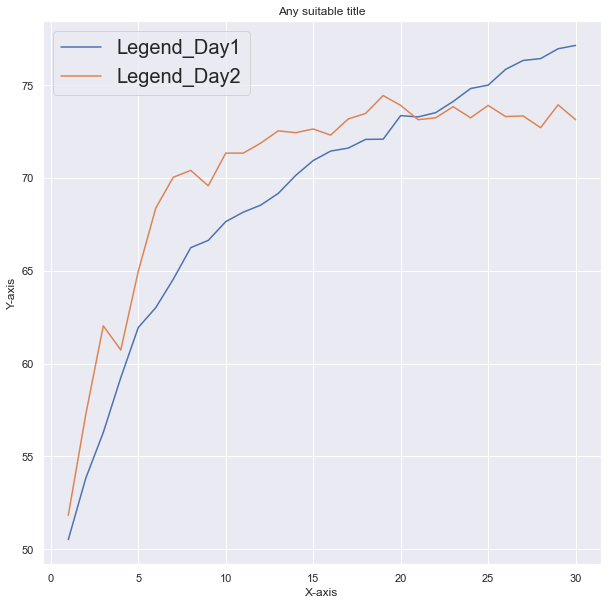

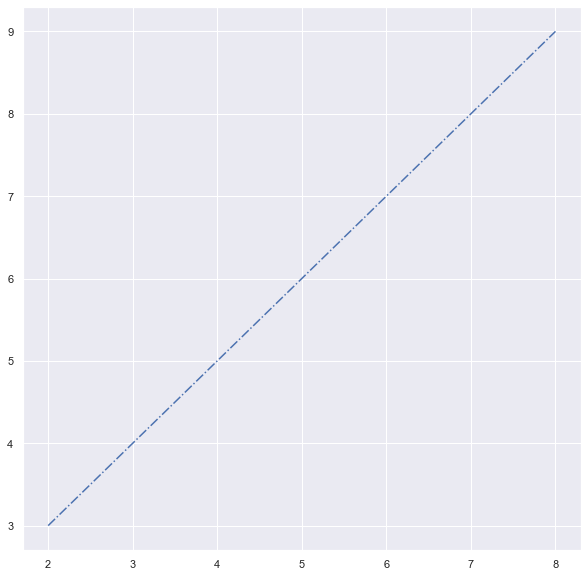

In [101]:
df[df.MODEL=='GABORNN']


x = epochs
y =df[df.MODEL=='GABORNN']['TRAINACC_PER']
y1=df[df.MODEL=='GABORNN']['TESTACC_PER']
  
plt.plot(x, y)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

plt.title("Any suitable title")
plt.plot(x, y1)
plt.legend(labels=["Legend_Day1","Legend_Day2"], fontsize = 20)
plt.show()  # show first chart
  
# The figure() function helps in creating a
# new figure that can hold a new chart in it.
plt.figure()
x1 = [2, 4, 6, 8]
y1 = [3, 5, 7, 9]
plt.plot(x1, y1, '-.')
  
# Show another chart with '-' dotted line
plt.show()

In [102]:
def compareAccuracy(model):
    x = epochs
    y =df[df.MODEL==model]['TRAINACC_PER']
    y1=df[df.MODEL==model]['TESTACC_PER']
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy(in Percentage)")
    plt.title("Accuracy of model " +model)
    plt.plot(x, y,color='red')
    plt.plot(x, y1,color='green')
    plt.legend(labels=["Train","Test"], fontsize = 15)
    plt.show() 

In [103]:
def compareLoss(model):
    x = epochs
    y =df[df.MODEL==model]['TRAINLOSS_PER']
    y1=df[df.MODEL==model]['TESTLOSS_PER']
    plt.xlabel("Epoch")
    plt.ylabel("Loss (in Percentage)")
    plt.title("Loss of model " +model)
    plt.plot(x, y,color='red')
    plt.plot(x, y1,color='green')
    plt.legend(labels=["Train","Test"], fontsize = 15)
    plt.show() 

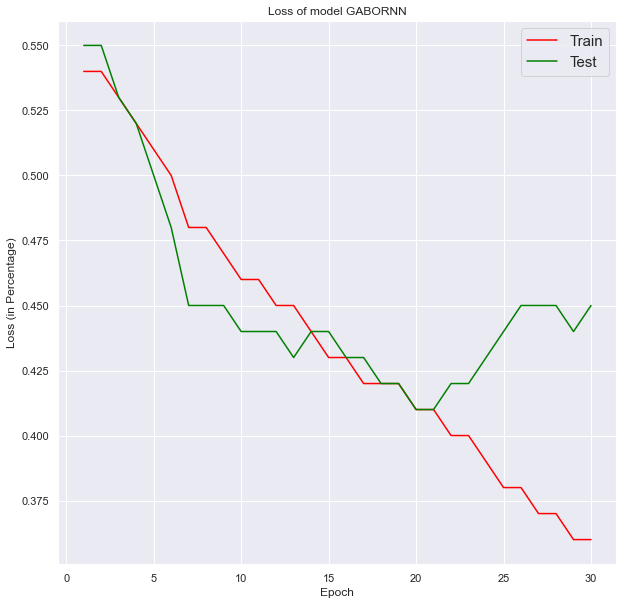

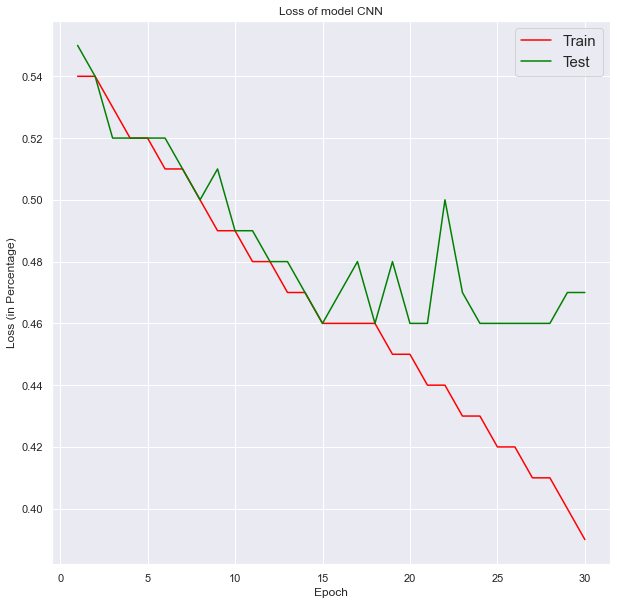

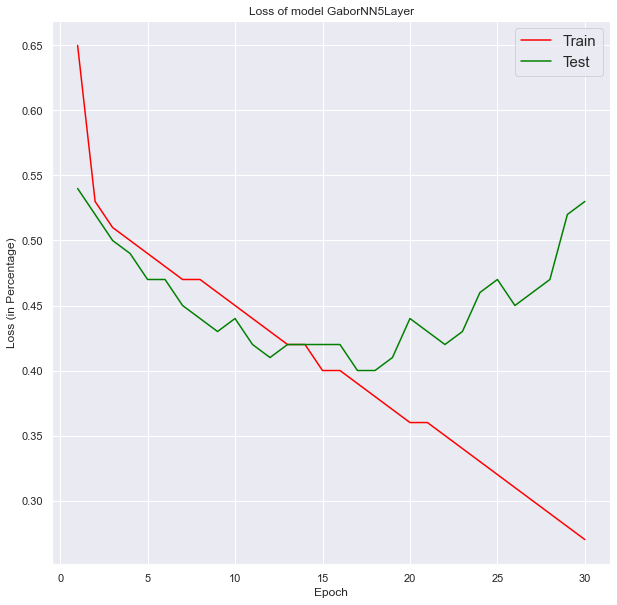

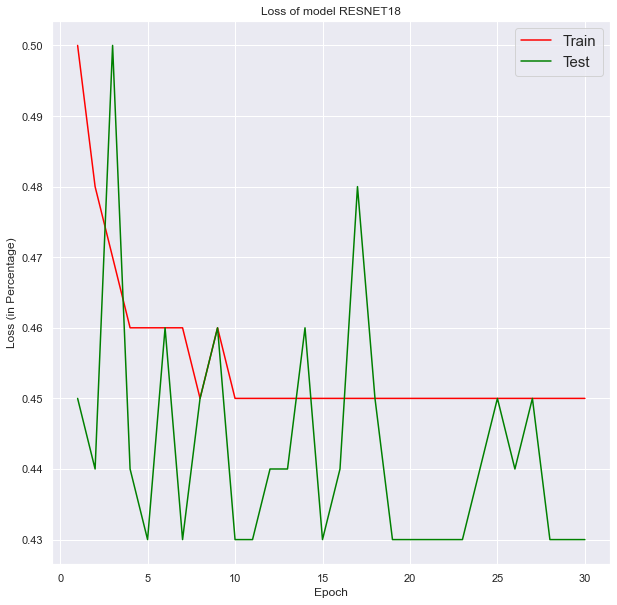

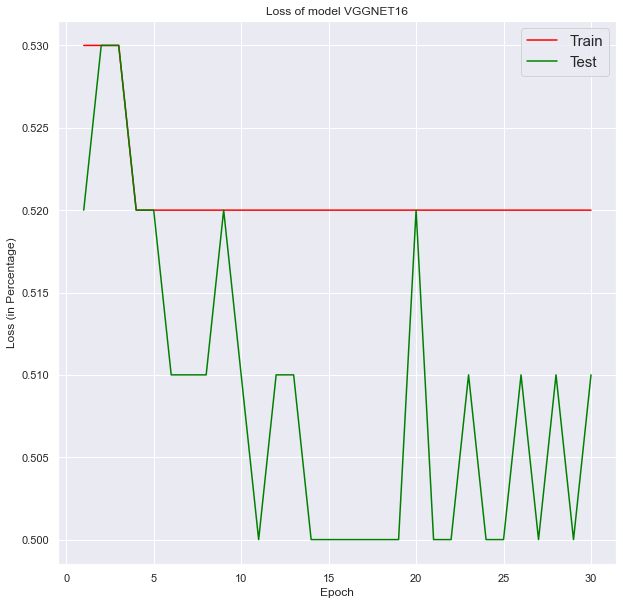

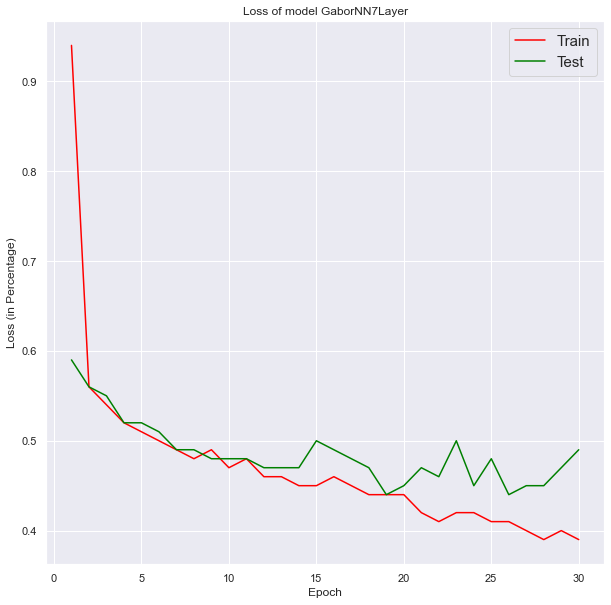

In [104]:
for model in models:
    compareLoss(model)

In [105]:
def compareROCCurve(model):
    x = epochs
    y =df[df.MODEL==model]['TRAINPRECISION']
    y1=df[df.MODEL==model]['TRAINRECALL']
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy(in Percentage)")
    plt.title("Accuracy of model " +model)
    plt.plot(y, y1,color='red')
   # plt.plot(x, y1,color='blue')
    #plt.legend(labels=["Train","Test"], fontsize = 15)
    plt.show() 

In [106]:
from sklearn.metrics import auc, average_precision_score
#auc(df[df.MODEL==model]['TRAINRECALL'], df[df.MODEL==model]['TRAINPRECISION'])

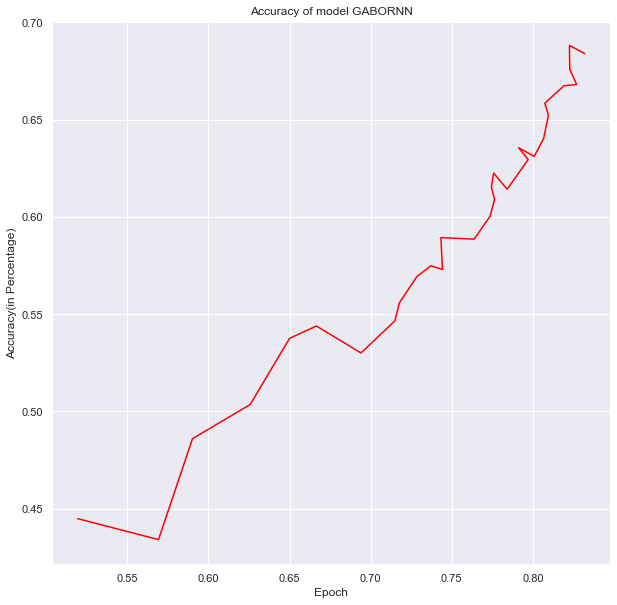

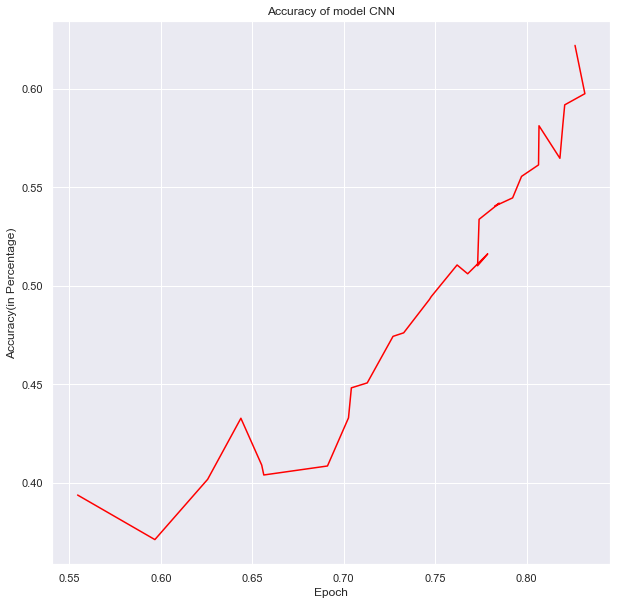

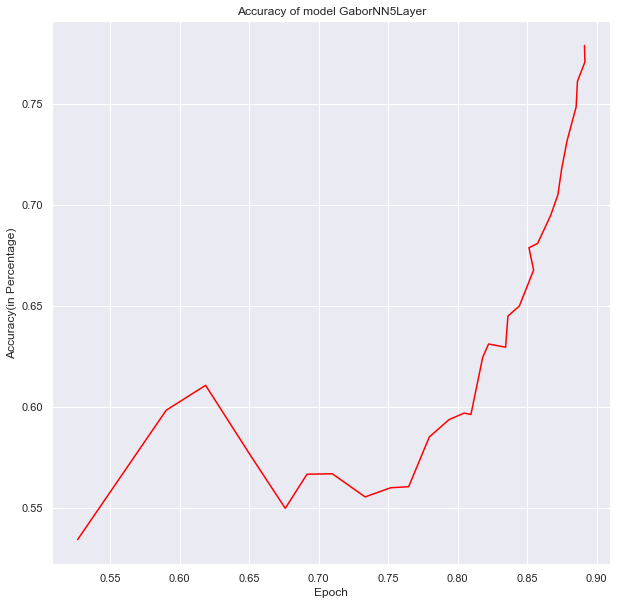

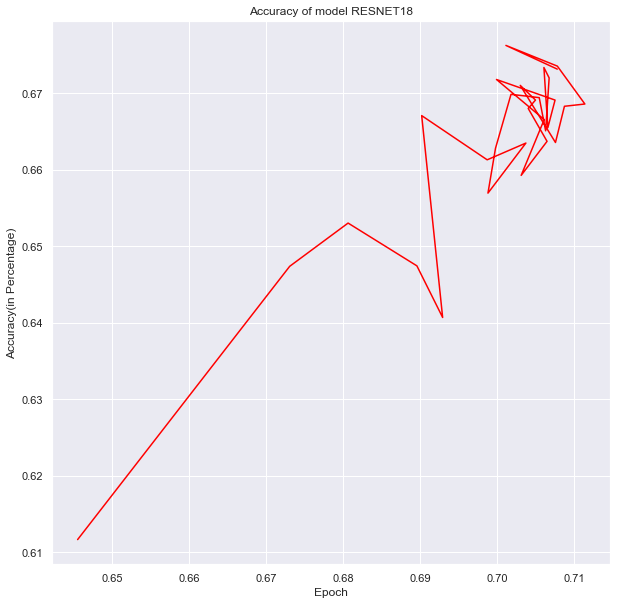

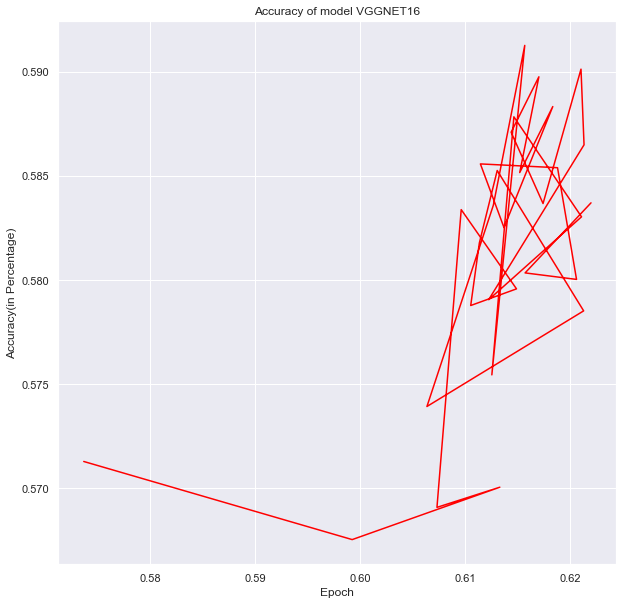

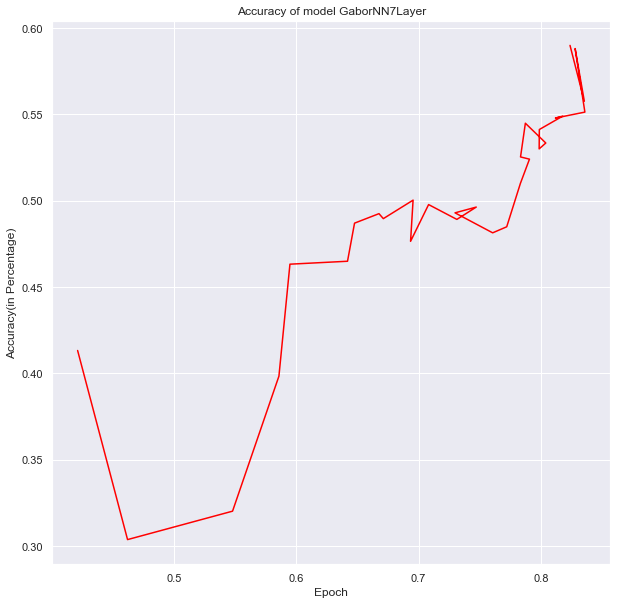

In [107]:
#compareROCCurve('GABORNN')
for model in models:
    compareROCCurve(model)

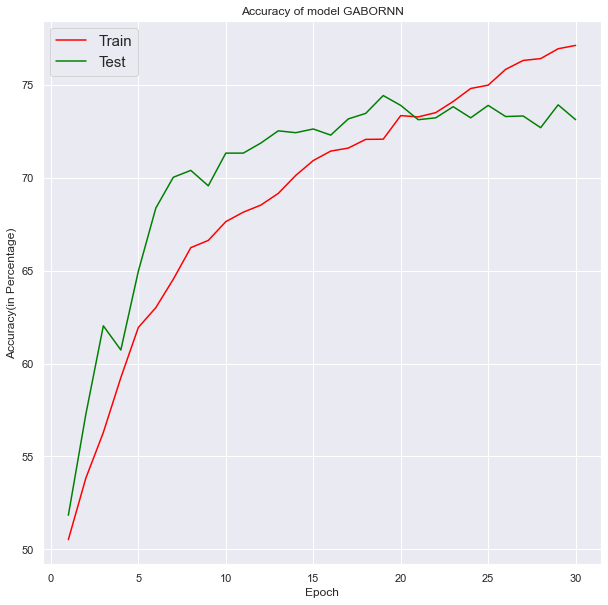

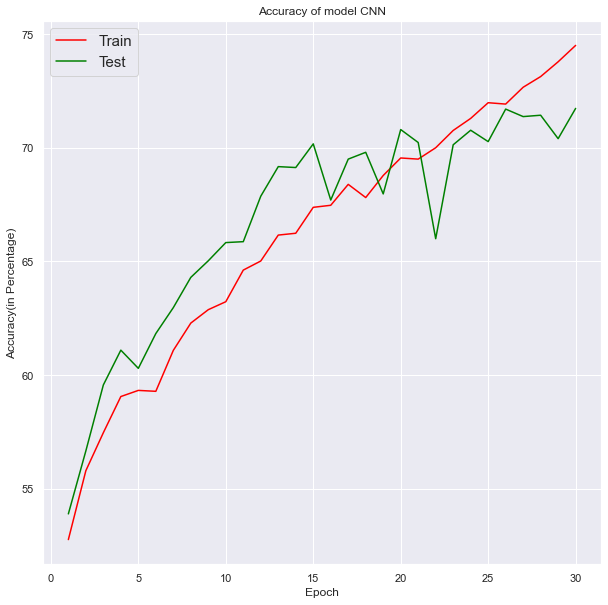

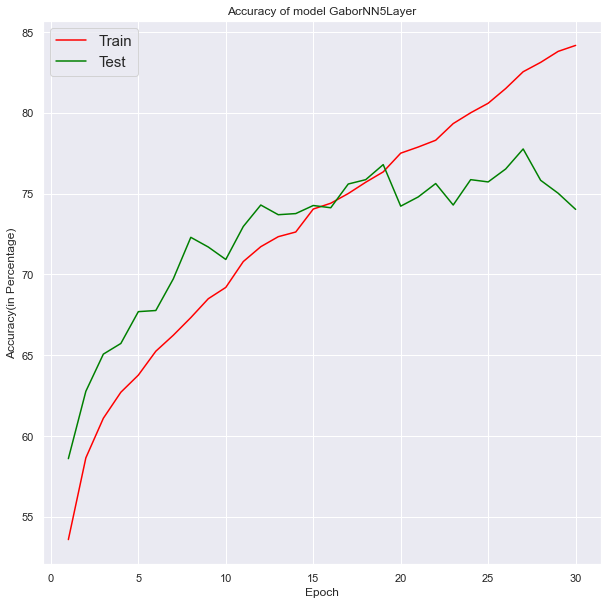

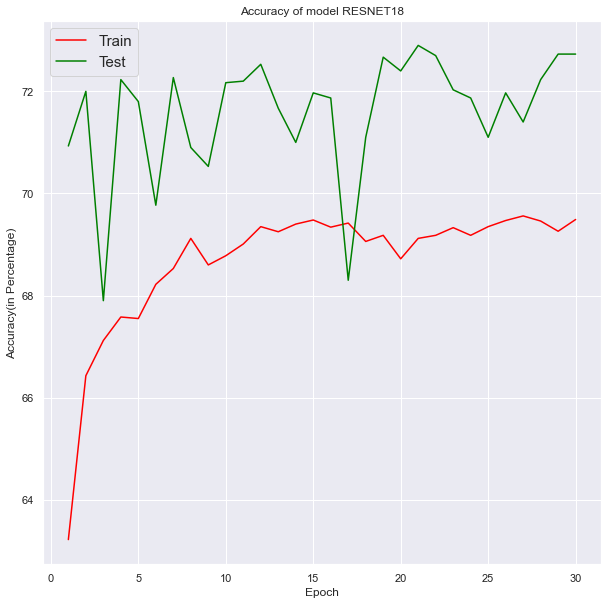

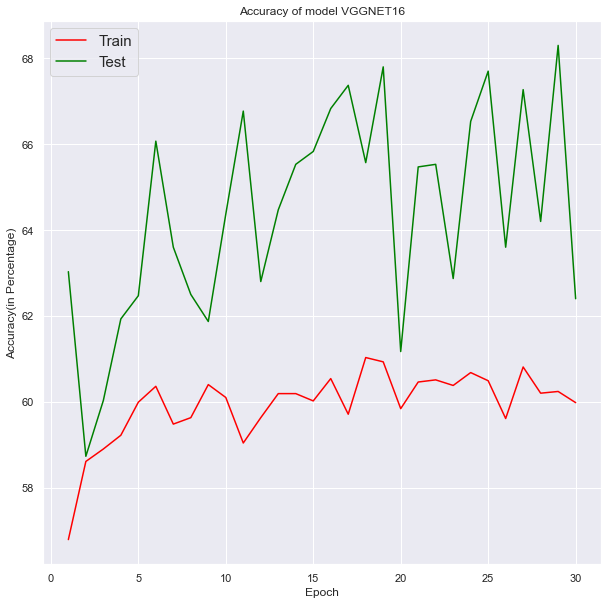

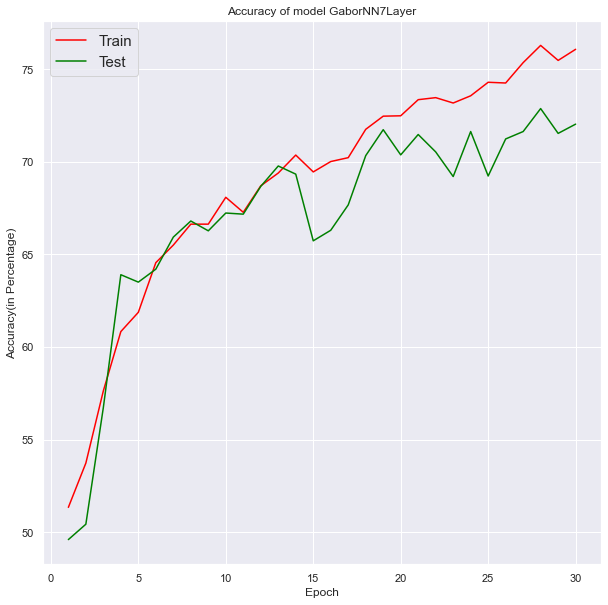

In [108]:
for model in models:
    compareAccuracy(model)

In [109]:
import seaborn as sns

#sns.lineplot( x=epochs, y=df[df.MODEL=='GABORNN']['TRAINACC_PER'], hue="month", style="month")
plt.figure(figsize=(50,50))
sns.set(rc={'figure.figsize':(10,10),'font.size':10})


<Figure size 3600x3600 with 0 Axes>

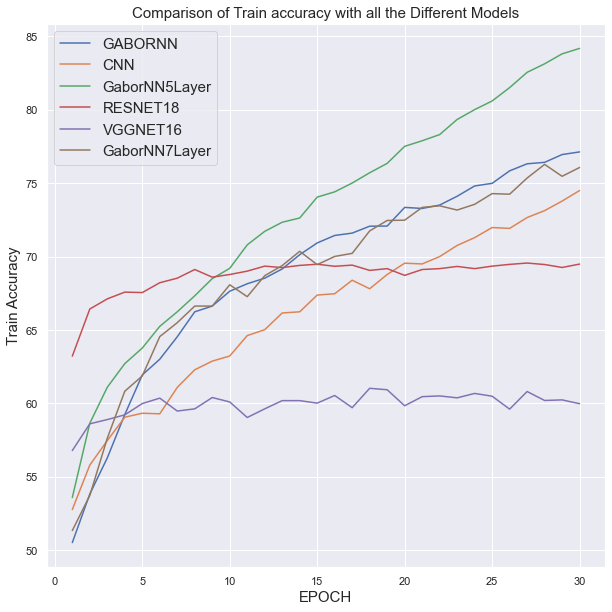

In [110]:


ax=sns.lineplot(data=df, x="EPOCH", y="TRAINACC_PER", hue="MODEL")

ax.set_ylabel('Train Accuracy',fontsize = 15)
ax.set_xlabel('EPOCH',fontsize = 15)
ax.set_title('Comparison of Train accuracy with all the Different Models',fontsize = 15)
plt.legend( fontsize = 15)



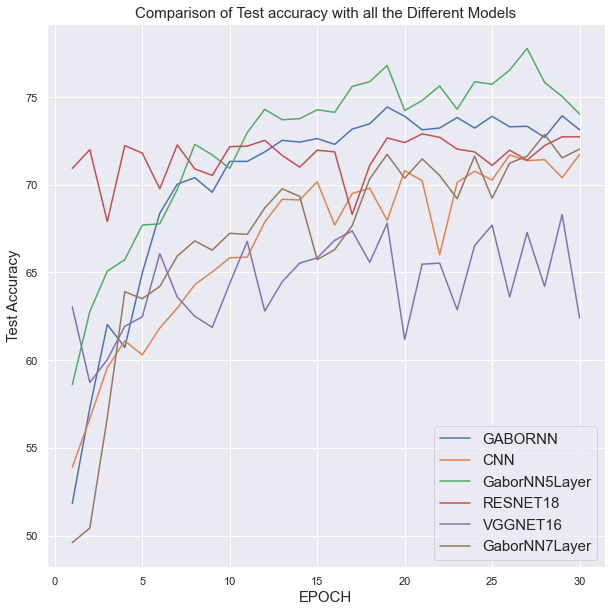

In [111]:
ax=sns.lineplot(data=df, x="EPOCH", y="TESTACC_PER", hue="MODEL")
ax.set_ylabel('Test Accuracy',fontsize = 15)
ax.set_xlabel('EPOCH',fontsize = 15)
ax.set_title('Comparison of Test accuracy with all the Different Models',fontsize = 15)
plt.legend( fontsize = 15)


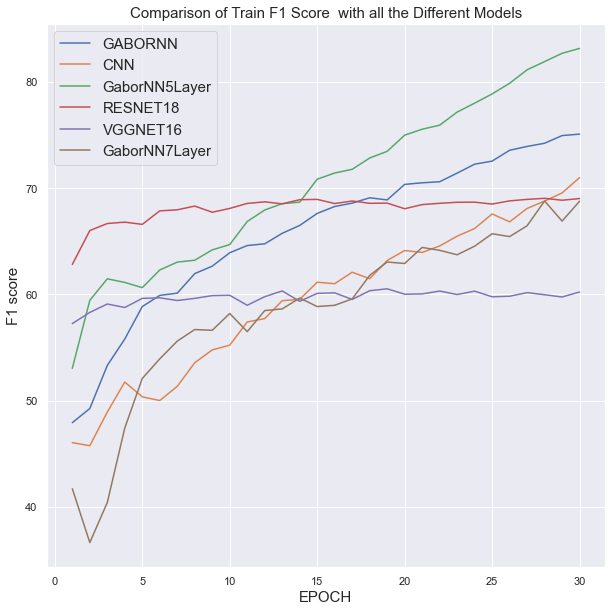

In [112]:
ax=sns.lineplot(data=df, x="EPOCH", y="TRAINF1SCORE_PER", hue="MODEL")
ax.set_ylabel('F1 score',fontsize = 15)
ax.set_xlabel('EPOCH',fontsize = 15)
ax.set_title('Comparison of Train F1 Score  with all the Different Models',fontsize = 15)
plt.legend( fontsize = 15)

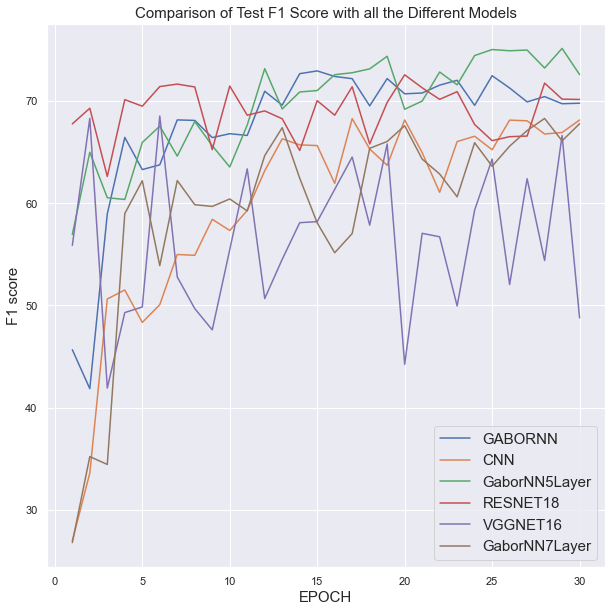

In [113]:
ax=sns.lineplot(data=df, x="EPOCH", y="TESTF1SCORE_PER", hue="MODEL")
ax.set_ylabel('F1 score',fontsize = 15)
ax.set_xlabel('EPOCH',fontsize = 15)
ax.set_title('Comparison of Test F1 Score with all the Different Models',fontsize = 15)
plt.legend( fontsize = 15)

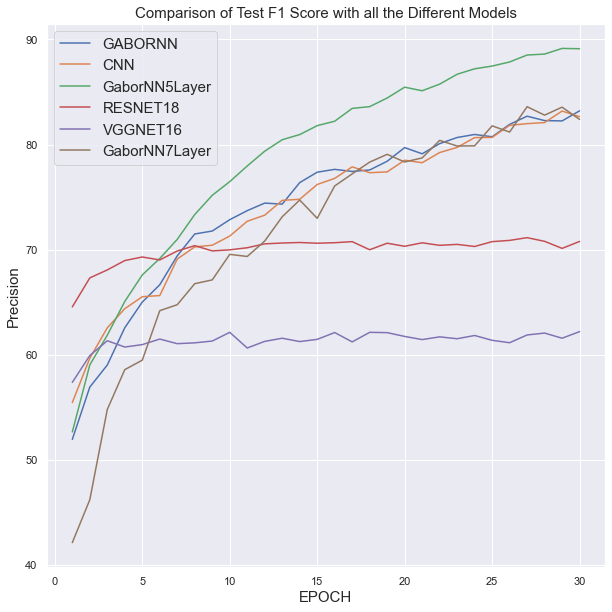

In [114]:
ax=sns.lineplot(data=df, x="EPOCH", y="TRAINPRECISION_PER", hue="MODEL")
ax.set_ylabel('Precision',fontsize = 15)
ax.set_xlabel('EPOCH',fontsize = 15)
ax.set_title('Comparison of Test F1 Score with all the Different Models',fontsize = 15)
plt.legend( fontsize = 15)

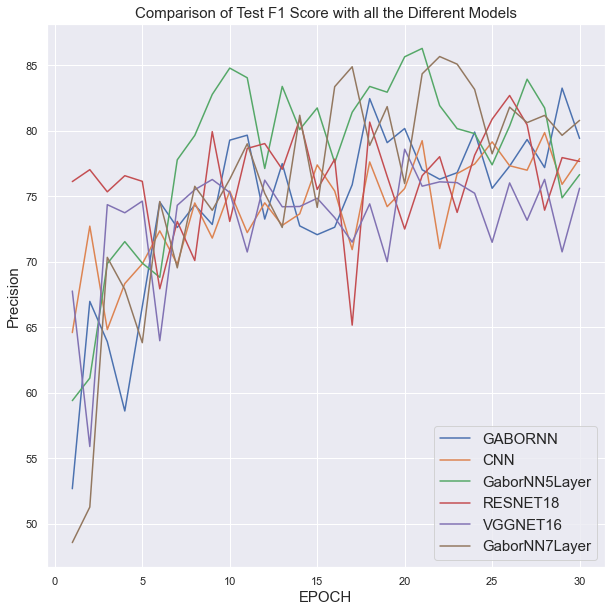

In [115]:
ax=sns.lineplot(data=df, x="EPOCH", y="TESTPRECISION_PER", hue="MODEL")
ax.set_ylabel('Precision',fontsize = 15)
ax.set_xlabel('EPOCH',fontsize = 15)
ax.set_title('Comparison of Test F1 Score with all the Different Models',fontsize = 15)
plt.legend( fontsize = 15)

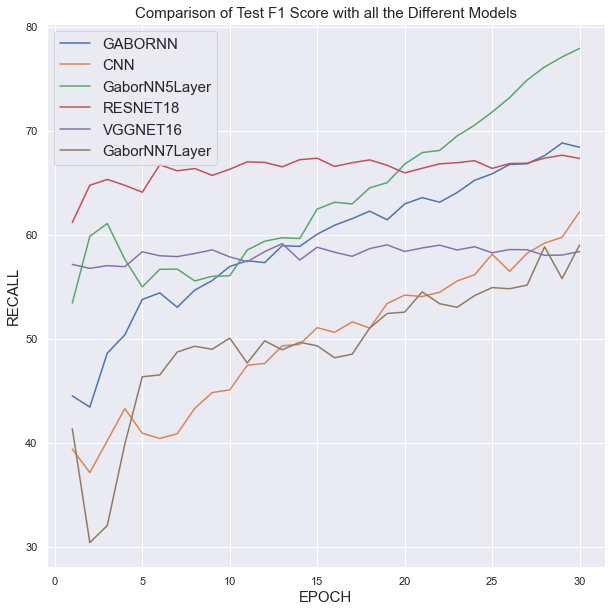

In [116]:
ax=sns.lineplot(data=df, x="EPOCH", y="TRAINRECALL_PER", hue="MODEL")
ax.set_ylabel('RECALL',fontsize = 15)
ax.set_xlabel('EPOCH',fontsize = 15)
ax.set_title('Comparison of Test F1 Score with all the Different Models',fontsize = 15)
plt.legend( fontsize = 15)

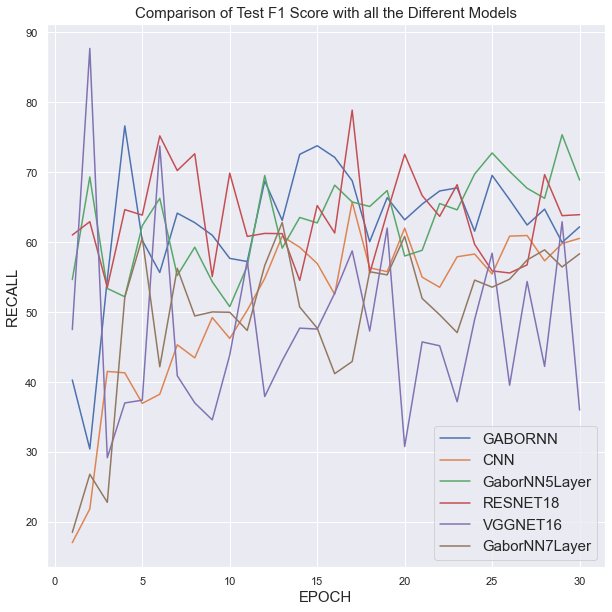

In [117]:
ax=sns.lineplot(data=df, x="EPOCH", y="TESTRECALL_PER", hue="MODEL")
ax.set_ylabel('RECALL ',fontsize = 15)
ax.set_xlabel('EPOCH',fontsize = 15)
ax.set_title('Comparison of Test F1 Score with all the Different Models',fontsize = 15)
plt.legend( fontsize = 15)

In [118]:
data=pd.read_csv('data.csv')
data

,category,count
0,Cracked,3756
1,CrackedCropped,1000
2,CrackedRot,1000
3,CrackedBlur,1000
4,CrackedBri,500
5,UnCracked,4302
6,UnCrackedCropped,818
7,UnCrackedRot,818
8,UnCrackedBlur,818
9,UnCrackedBri,500


In [119]:
TotalCracked=data[data['category'].isin(['Cracked','CrackedRot','CrackedCropped','CrackedBlur','CrackedBri'])]['count'].sum()
TotalUncracked=data[data['category'].isin(['UnCracked','UnCrackedRot','UnCrackedCropped','UnCrackedBlur','UnCrackedBri'])]['count'].sum()

In [120]:
data.loc[len(data.index)] = ['TotalCracked', TotalCracked] 
data.loc[len(data.index)] = ['TotalUnCracked', TotalUncracked] 
data

,category,count
0,Cracked,3756
1,CrackedCropped,1000
2,CrackedRot,1000
3,CrackedBlur,1000
4,CrackedBri,500
5,UnCracked,4302
6,UnCrackedCropped,818
7,UnCrackedRot,818
8,UnCrackedBlur,818
9,UnCrackedBri,500


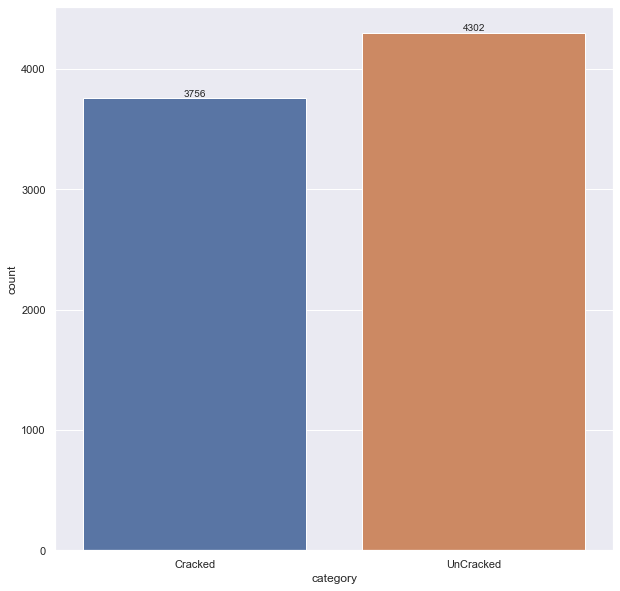

In [121]:
ax=sns.barplot(x = 'category',
            y = 'count',
            data = data[data['category'].isin(['Cracked','UnCracked'])])
ax.bar_label(ax.containers[0])
# Show the plot
plt.show()



In [122]:
def barPlot(columns,orient):
    if orient=='h':
        ax=sns.barplot(x = 'count',
            y = 'category',
            data = data[data['category'].isin(columns)], orient=orient)
        ax.bar_label(ax.containers[0])
        plt.show()
    else:
        ax=sns.barplot(x = 'category',
                y = 'count',
                data = data[data['category'].isin(columns)], orient=orient)
        ax.bar_label(ax.containers[0])
        plt.show()
    
    

In [123]:
columns=['Cracked','UnCracked']

In [124]:
plt.figure(figsize=(10,10))
sns.set(rc={'figure.figsize':(5,5),'font.size':10})

<Figure size 720x720 with 0 Axes>

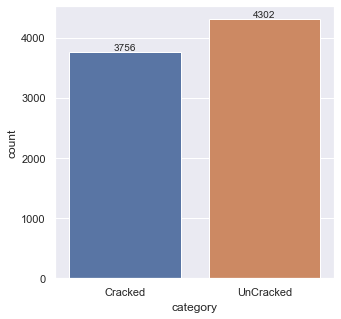

In [125]:
barPlot(columns,'v')

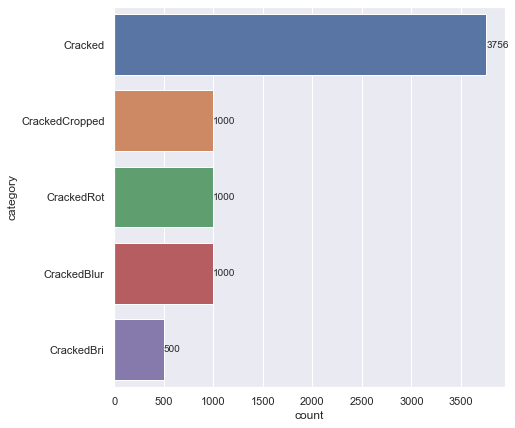

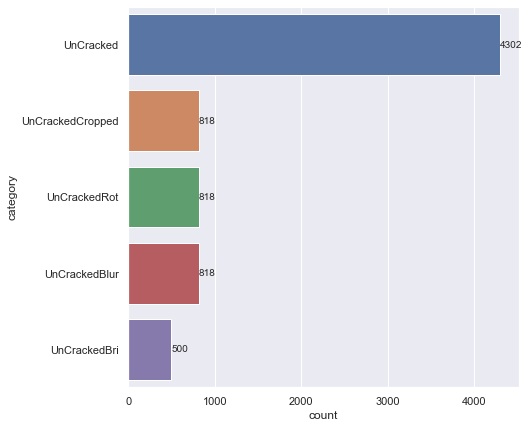

In [126]:
sns.set(rc={'figure.figsize':(7,7),'font.size':10})
barPlot(['Cracked','CrackedRot','CrackedCropped','CrackedBlur','CrackedBri'],'h')
barPlot(['UnCracked','UnCrackedRot','UnCrackedCropped','UnCrackedBlur','UnCrackedBri'],'h')

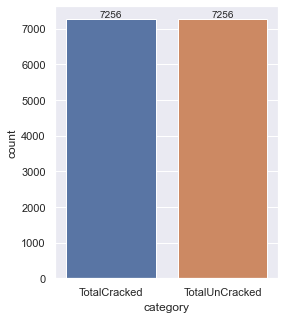

In [127]:
sns.set(rc={'figure.figsize':(4,5),'font.size':10})
barPlot(['TotalCracked','TotalUnCracked'],'v')


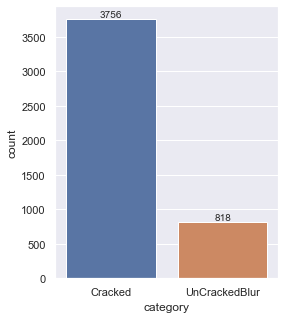

In [128]:
barPlot(['Cracked','UnCrackedBlur'],'v')

In [129]:
data[(data['category']=='Cracked')]# or  data['category']=='Uncracked')]

,category,count
0,Cracked,3756


In [130]:
data[data['category'].isin(['Cracked','UnCracked'])]

,category,count
0,Cracked,3756
5,UnCracked,4302


In [131]:
data['category'].isin(['Cracked','Uncracked'])

0      True
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
Name: category, dtype: bool

In [132]:
data['category']

0              Cracked
1       CrackedCropped
2           CrackedRot
3          CrackedBlur
4           CrackedBri
5            UnCracked
6     UnCrackedCropped
7         UnCrackedRot
8        UnCrackedBlur
9         UnCrackedBri
10        TotalCracked
11      TotalUnCracked
Name: category, dtype: object

In [163]:
modeldf=pd.read_csv("ModelResult.csv");


In [136]:
modeldf

,MODEL,EPOCH,TRAINACC,TRAINLOSS,TESTACC,TESTLOSS,TIME,TRAINPRECISION,TRAINRECALL,TRAINF1SCORE,TESTPRECISION,TESTRECALL,TESTF1SCORE,TRAINAUC,TESTAUC
0,ProposedModel,1,0.548167,0.005568,0.588667,0.005359,56.885503,0.559773,0.525518,0.542105,0.570668,0.719482,0.636492,0.548499,0.588946
1,ProposedModel,2,0.611080,0.005133,0.656667,0.004933,54.372894,0.626099,0.574706,0.599303,0.633822,0.743988,0.684501,0.611556,0.657891
2,ProposedModel,3,0.636577,0.004927,0.665000,0.004762,53.360165,0.642467,0.625953,0.634102,0.669539,0.649177,0.659201,0.637561,0.665465
3,ProposedModel,4,0.656560,0.004800,0.699667,0.004469,53.361548,0.678658,0.606923,0.640789,0.749006,0.599158,0.665754,0.657021,0.699543
4,ProposedModel,5,0.671169,0.004642,0.706667,0.004448,53.205486,0.717190,0.580182,0.641452,0.727891,0.660456,0.692536,0.672402,0.706210
5,ProposedModel,6,0.682539,0.004583,0.723333,0.004280,53.102549,0.737332,0.582420,0.650784,0.735107,0.694482,0.714218,0.683698,0.723263
6,ProposedModel,7,0.699421,0.004450,0.731000,0.004289,53.510910,0.758998,0.595889,0.667626,0.831565,0.582908,0.685380,0.701381,0.731927
7,ProposedModel,8,0.702246,0.004408,0.733000,0.004148,52.742791,0.773548,0.586968,0.667464,0.740050,0.718121,0.728921,0.703552,0.732818
8,ProposedModel,9,0.713616,0.004295,0.738667,0.004080,53.445694,0.784806,0.595768,0.677345,0.830831,0.600207,0.696936,0.714622,0.738320
9,ProposedModel,10,0.717958,0.004239,0.743333,0.004029,53.691096,0.800219,0.589409,0.678824,0.835705,0.609883,0.705156,0.718689,0.744409


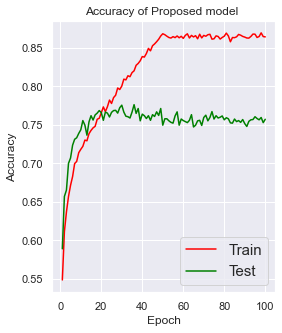

In [173]:
    x = modeldf['EPOCH']
    y =modeldf['TRAINACC']
    y1=modeldf['TESTACC']
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Accuracy of Proposed model " )
    plt.plot(x, y,color='red')
    plt.plot(x, y1,color='green')
    plt.legend(labels=["Train","Test"], fontsize = 15)
    plt.show()

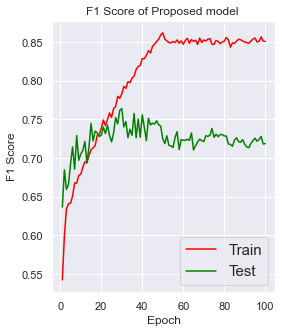

In [174]:
    x = modeldf['EPOCH']
    y =modeldf['TRAINF1SCORE']
    y1=modeldf['TESTF1SCORE']
    plt.xlabel("Epoch")
    plt.ylabel("F1 Score")
    plt.title("F1 Score of Proposed model " )
    plt.plot(x, y,color='red')
    plt.plot(x, y1,color='green')
    plt.legend(labels=["Train","Test"], fontsize = 15)
    plt.show()

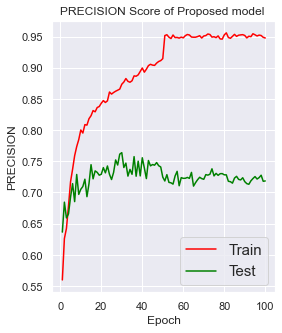

In [175]:
    x = modeldf['EPOCH']
    y =modeldf['TRAINPRECISION']
    y1=modeldf['TESTF1SCORE']
    plt.xlabel("Epoch")
    plt.ylabel("PRECISION")
    plt.title("PRECISION Score of Proposed model " )
    plt.plot(x, y,color='red')
    plt.plot(x, y1,color='green')
    plt.legend(labels=["Train","Test"], fontsize = 15)
    plt.show()

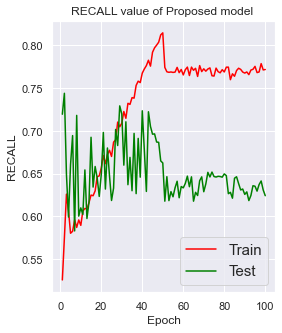

In [176]:
    x = modeldf['EPOCH']
    y =modeldf['TRAINRECALL']
    y1=modeldf['TESTRECALL']
    plt.xlabel("Epoch")
    plt.ylabel("RECALL")
    plt.title("RECALL value of Proposed model " )
    plt.plot(x, y,color='red')
    plt.plot(x, y1,color='green')
    plt.legend(labels=["Train","Test"], fontsize = 15)
    plt.show()

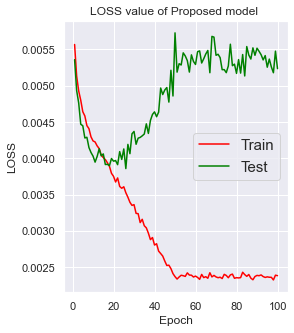

In [177]:
    x = modeldf['EPOCH']
    y =modeldf['TRAINLOSS']
    y1=modeldf['TESTLOSS']
    plt.xlabel("Epoch")
    plt.ylabel("LOSS")
    plt.title("LOSS value of Proposed model " )
    plt.plot(x, y,color='red')
    plt.plot(x, y1,color='green')
    plt.legend(labels=["Train","Test"], fontsize = 15)
    plt.show()

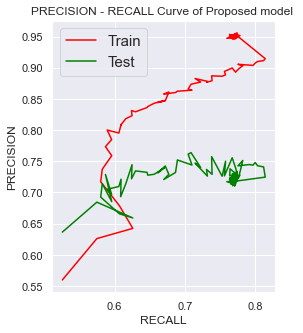

In [180]:
    y = modeldf['TRAINPRECISION']
    x =modeldf['TRAINRECALL']
    y1=modeldf['TESTF1SCORE']
    plt.xlabel("RECALL")
    plt.ylabel("PRECISION")
    plt.title("PRECISION - RECALL Curve of Proposed model " )
    plt.plot(x, y,color='red')
    plt.plot(x, y1,color='green')
    plt.legend(labels=["Train","Test"], fontsize = 15)
    plt.show()

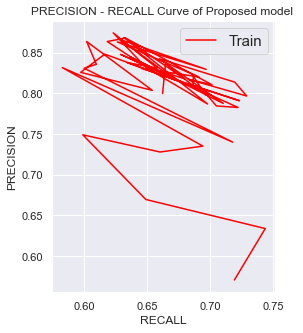

In [154]:
y = modeldf['TESTPRECISION']
x =modeldf['TESTRECALL']
# y1=modeldf['TESTF1SCORE']
plt.xlabel("RECALL")
plt.ylabel("PRECISION")
plt.title("PRECISION - RECALL Curve of Proposed model " )
plt.plot(x, y,color='red')
plt.legend(labels=["Train","Test"], fontsize = 15)
plt.show()